<a href="https://colab.research.google.com/github/karolkruszynski/GoldStockPriceDA/blob/main/Gold_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries imported

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading

In [10]:
df = pd.read_csv('/content/goldstock.csv')

# Data cleaning & preprocessing

In [11]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [12]:
df.columns

Index(['Unnamed: 0', 'Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

Unnamed: 0 column looks like an index so we will rename it and set it as index

In [13]:
df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

In [14]:
df.set_index('ID', inplace=True)

In [15]:
df.head()

,Date,Close,Volume,Open,High,Low
ID,,,,,,
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


Now our data looks clean, I like it 😀

In [16]:
df.describe()

,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,298.824811,97600.769382,299.118187,301.262244,296.417703
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


All the price data is numerical, this is ok for us

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2532
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 137.3+ KB


No null values give us good insights

In [18]:
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

# Tasks: Level Easy

1. **Basic Statistics: List basic descriptive statistics for the "Close" racks (mean, median, standard deviation).**

In [19]:
avg_close_price = df['Close'].mean()
avg_close_price.round(2)

1498.73

In [20]:
median_close_price = df['Close'].median()
median_close_price

1332.8

In [21]:
std_close_price = df['Close'].std()
std_close_price.round(2)

298.82

 2. **Closes Histogram: Create a closes histogram ("Close" column) using Matplotlib.**

Text(0, 0.5, 'Frequency')

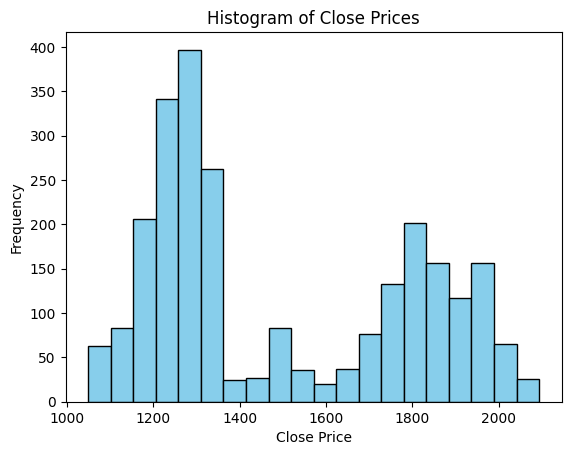

In [22]:
plt.hist(df['Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

3. **Daily Price Change: Add a new "Daily Change" column, representing the daily price change (the difference between "Close" and "Open").**

In [23]:
df['Daily_Price_Change'] = df['Close'] - df['Open']

In [24]:
df.head()

,Date,Close,Volume,Open,High,Low,Daily_Price_Change
ID,,,,,,,
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,1.9
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,12.5
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,-25.2
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,-23.2
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,18.4


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2532
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2511 non-null   object 
 1   Close               2511 non-null   float64
 2   Volume              2511 non-null   float64
 3   Open                2511 non-null   float64
 4   High                2511 non-null   float64
 5   Low                 2511 non-null   float64
 6   Daily_Price_Change  2511 non-null   float64
dtypes: float64(6), object(1)
memory usage: 156.9+ KB


4. **Average Volume Value: Calculate the average volume value.**

In [26]:
avg_volume_value = df['Volume'].mean()
avg_volume_value.round(2)

185970.77

# Task: Level Medium

1. **Average Monthly Closing Price: Calculate the average closing price for each month.**

I used `pd.to_datetime(df['Date']).dt.month` to get the month from the date column.
It easily converts the date column to a datetime object and then extracts the month from it. It will be much more useful in the future.

In [27]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df

,Date,Close,Volume,Open,High,Low,Daily_Price_Change,Month
ID,,,,,,,,
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,1.9,1
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,12.5,1
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,-25.2,1
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,-23.2,1
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,18.4,1
...,...,...,...,...,...,...,...,...
2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0,-4.4,1
2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0,-6.4,1
2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9,0.2,1


Now I can group by month and calculate the average closing price. I also sort the values in descending order just to make it easier to read. 😉

In [28]:
avg_monthly_closing_price = df.groupby('Month')['Close'].mean()
avg_monthly_closing_price.sort_values(ascending=False)

Month
8     1526.394595
11    1519.450679
9     1509.069608
1     1506.526238
6     1501.907009
4     1500.653659
7     1500.503810
5     1498.544550
12    1493.522749
3     1486.742727
2     1473.379058
10    1462.508000
Name: Close, dtype: float64

2. **Compare opening and closing prices: Create a line chart comparing the opening and closing prices for each year date.**

In [29]:
year = pd.to_datetime(df['Date']).dt.year
year_unique = year.unique()
year_unique

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

I created a new variable called `year` and used `pd.to_datetime(df['Date']).dt.year` to get the year from the date column. Then I created a new variable called `year_unique` and used `year.unique()` to get all the unique years in the dataset.

In [30]:
comp_op_cl_price = df.groupby(year)['Open', 'Close'].mean()
comp_op_cl_price

<ipython-input-30-e5f8478a5a93>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  comp_op_cl_price = df.groupby(year)['Open', 'Close'].mean()


,Open,Close
Date,,
2014,1267.473222,1267.846862
2015,1159.344048,1158.809524
2016,1250.996032,1251.715079
2017,1260.161753,1260.572112
2018,1272.184800,1272.021600
2019,1396.484127,1397.123016
2020,1779.630952,1779.716667
2021,1803.721032,1802.878175
2022,1809.166532,1808.683871


Next step was to group by year and calculate the average opening and closing prices.

<Axes: xlabel='Date'>

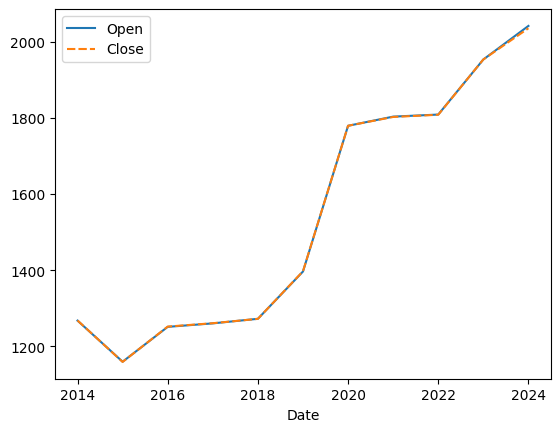

In [31]:
sns.lineplot(data=comp_op_cl_price)

I create a simple line chart using `sns.lineplot` to compare the opening and closing prices for each year. But it is not very informative.

([<matplotlib.axis.XTick at 0x7fdef020f970>,
 [Text(2492.0, 0, '2024-01-19'),
  Text(1995.0, 0, '2022-01-21'),
  Text(1514.0, 0, '2020-01-29'),
  Text(1016.0, 0, '2018-02-02'),
  Text(516.0, 0, '2016-02-09'),
  Text(31.0, 0, '2014-03-07')])

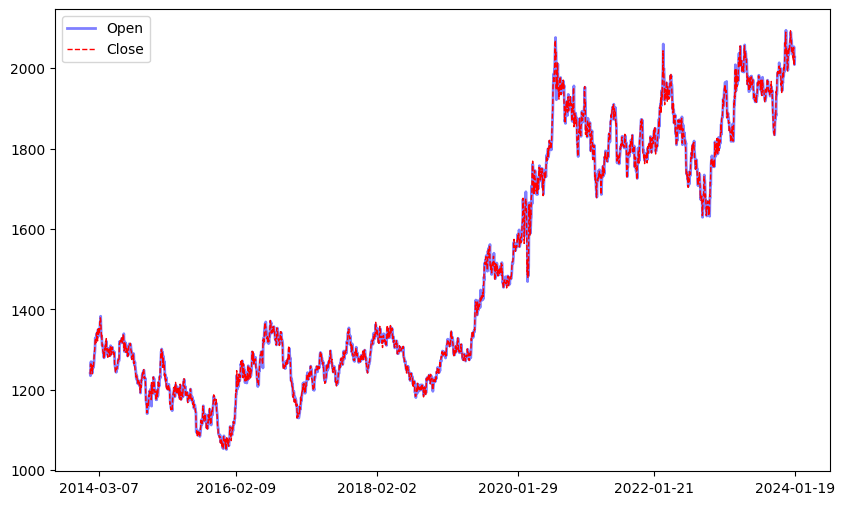

In [32]:
df.sort_values(by='Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], label='Open', color='blue', alpha=0.5, linewidth=2)
plt.plot(df['Date'], df['Close'], label='Close', color='red', linestyle='dashed', linewidth=1 )
plt.legend()
plt.xticks([df['Date'][i] for i in range(0, 3000, 500)])

First I sorted the values by date in ascending order. Then I set the figure size to 10x6 pixels. Then I plotted the "Open" and "Close" prices for each date using the `plt.plot` function. The `plt.xticks` function is used to label the x-axis with every 500th date, to make it easier to read.

3. **Correlation: Check the correlation between "High" and "Low" using Pandas.**

In [33]:
corr_high_low = df['High'].corr(df['Low'])
corr_high_low

0.9992509949448127

4. **Average closing price for a given year: Calculate the average closing price for each year.**

In [34]:
avg_close_price_per_year = df.groupby(year)['Close'].mean()
avg_close_price_per_year

Date
2014    1267.846862
2015    1158.809524
2016    1251.715079
2017    1260.572112
2018    1272.021600
2019    1397.123016
2020    1779.716667
2021    1802.878175
2022    1808.683871
2023    1954.053600
2024    2036.053846
Name: Close, dtype: float64

I simply grouped by year and calculated the average closing price.

<Axes: xlabel='Date'>

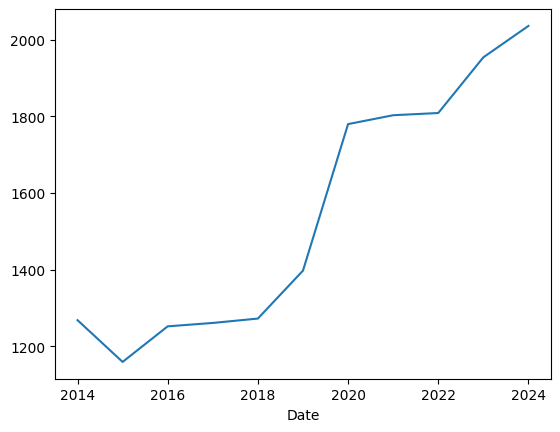

In [35]:
avg_close_price_per_year.plot()

Plotting the average closing price for each year.

<Axes: xlabel='Date'>

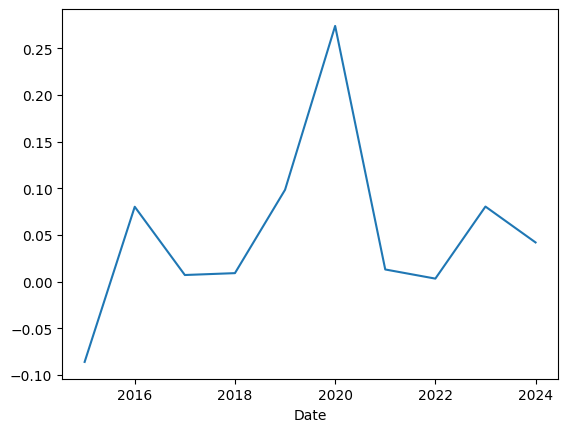

In [36]:
change_in_price = avg_close_price_per_year.pct_change()
change_in_price.plot()

Plotting the percentage change in the average closing price.

5. **Volume over time: Create a line chart showing volume changes over time.**

([<matplotlib.axis.XTick at 0x7fdeee842320>,
 [Text(2492.0, 0, '2024-01-19'),
  Text(1995.0, 0, '2022-01-21'),
  Text(1514.0, 0, '2020-01-29'),
  Text(1016.0, 0, '2018-02-02'),
  Text(516.0, 0, '2016-02-09'),
  Text(31.0, 0, '2014-03-07')])

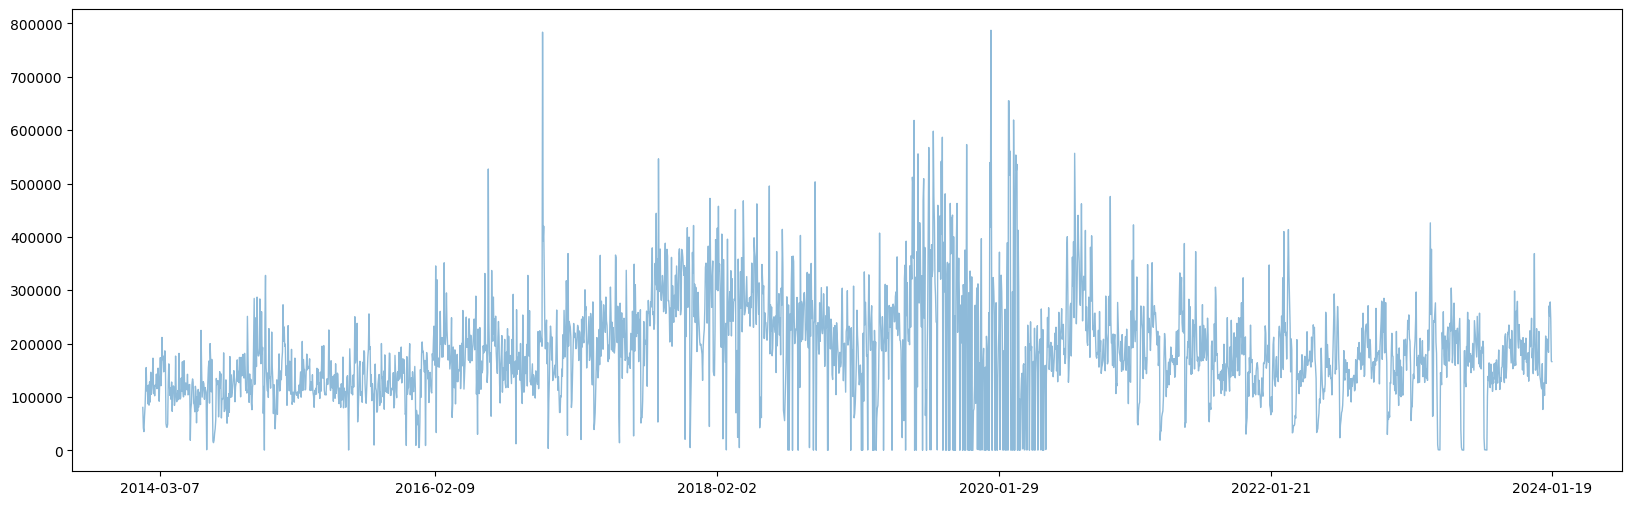

In [37]:
vol_df= df['Volume']
plt.figure(figsize=(20, 6))
plt.plot(df['Date'],vol_df, linewidth=1, alpha=0.5)
plt.xticks([df['Date'][i] for i in range(0, 3000, 500)])

# Task: Level Hard

1. **Cumulative Daily Rate of Return: Calculate the cumulative daily rate of return at close and graph it.**

In [38]:
df.sort_values(by='Date',ascending=False, inplace=True)

In [39]:
df.head()

,Date,Close,Volume,Open,High,Low,Daily_Price_Change,Month
ID,,,,,,,,
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,1.9,1
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,12.5,1
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,-25.2,1
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,-23.2,1
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,18.4,1


<Axes: xlabel='ID'>

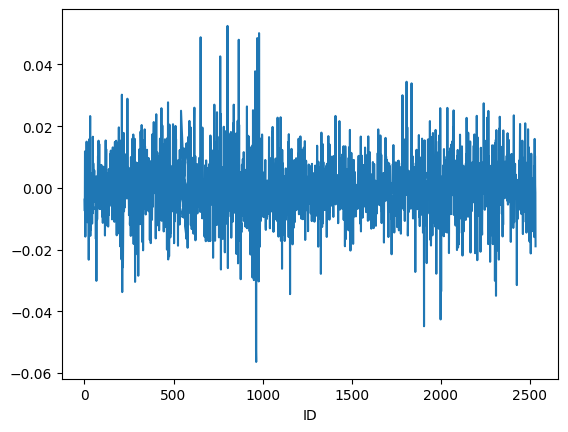

In [40]:
daily_ror = (df['Close'] / df['Close'].shift(1)) - 1
daily_ror.plot()

<Axes: xlabel='ID'>

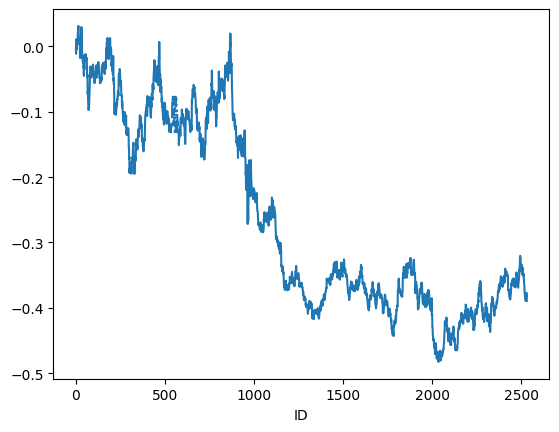

In [41]:
cumm_ror_daily = (1 + daily_ror).cumprod() - 1
cumm_ror_daily.plot()

I used `df['Close'] / df['Close'].shift(1) - 1` to calculate the daily rate of return. Then I used `cumm_ror_daily = (1 + daily_ror).cumprod() - 1` to calculate the cumulative daily rate of return. I decide to use `cumprod()` because it calculates the cumulative product of the values in the series.

<Axes: >

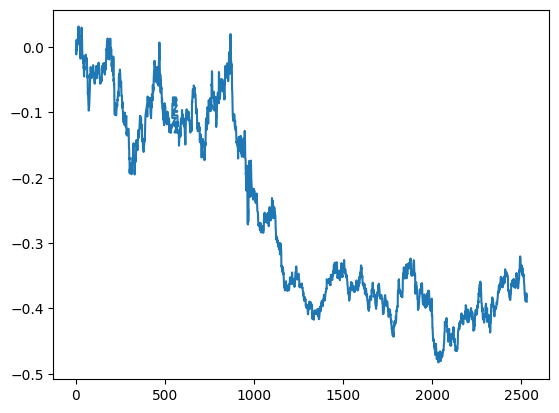

In [42]:
gpt_cumm_ror_daily = pd.concat([pd.Series([0]), cumm_ror_daily])
gpt_cumm_ror_daily.plot()

Here is the cumulative daily rate of return with a starting value of 0.

2. **Moving Average: Create a chart with a 50-day moving average of closing prices.**

In [43]:
df_sorted_by_date = df.set_index('Date', inplace=True)

In [44]:
df_sorted_by_date = df.sort_values(by='Date', ascending=True)

Finally I sorted the values by date in ascending order. And set the index to "Date". It was necessary for the `pd.rolling` function to work. Now we see results from 2014 to 2024.

In [45]:
moving_avg_50_days = df_sorted_by_date['Close'].rolling(50).mean()

I used `df_sorted_by_date['Close'].rolling(50).mean()` to calculate the 50-day moving average of closing prices. `.rolling()` is used to calculate the rolling mean. 50 is the window size. It means that the mean will be calculated over the last 50 days (50 rows).

<Axes: xlabel='Date'>

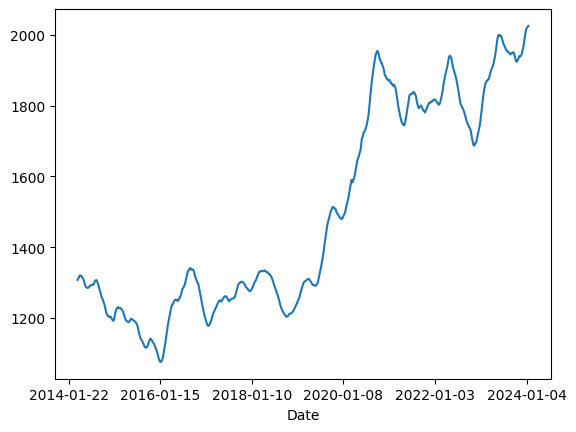

In [46]:
moving_avg_50_days.plot()

3. **Cluster Analysis: Apply a clustering algorithm (e.g. KMeans) to closed prices and then arrange the results on a chart before placing them.**

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [64]:
X = df_sorted_by_date[['Close']].values # Extract the 'Close' column as the feature
scaler = StandardScaler() # Initialize the StandardScaler
X_scaled = scaler.fit_transform(X) # Fit and transform the feature
n_clusters = 3 # Set the number of clusters

In [65]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42) # Initialize the KMeans
df['Cluster'] = kmeans.fit_predict(X_scaled) # Fit and predict the KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Closing price cluster analysis using KMeans')

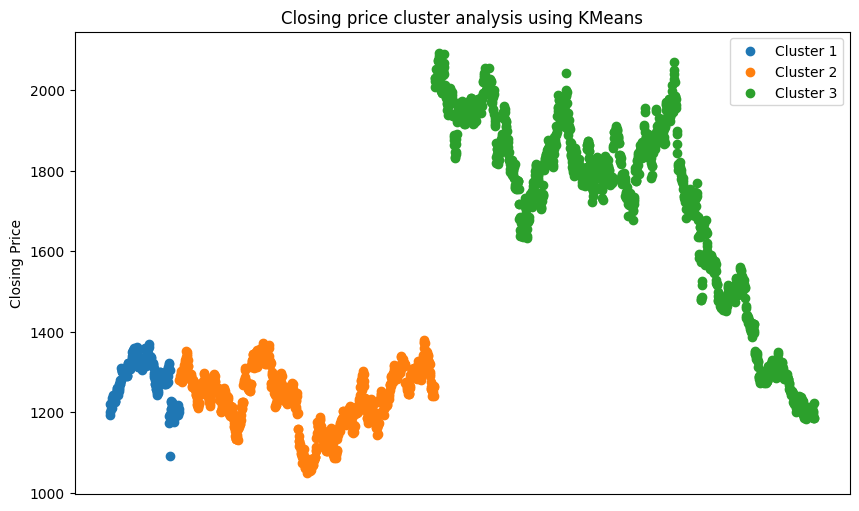

In [67]:
plt.figure(figsize=(10, 6))
for i in range(n_clusters): # Loop through each cluster
    cluster_data = df[df['Cluster'] == i] # Filter the data for the current cluster
    plt.scatter(cluster_data.index, cluster_data['Close'], label=f'Cluster {i + 1}') # Plot the data for the current cluster starting from the index 1 not 0
plt.xticks([])
plt.legend()
plt.ylabel('Closing Price')
plt.title('Closing price cluster analysis using KMeans')


4. **Daily Change Histogram: Create a histogram of daily price changes (use the "Daily Change" column).**

<Axes: >

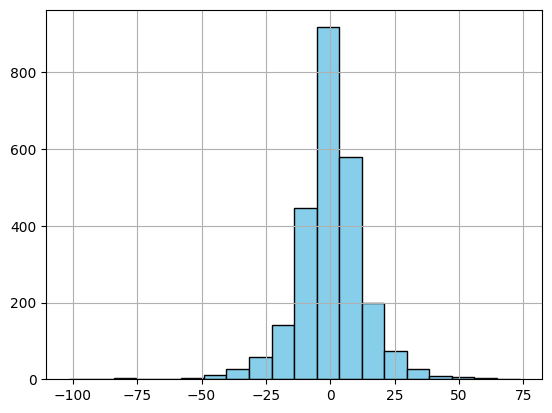

In [74]:
daily_change_hist = df['Daily_Price_Change'].hist(bins=20, color='skyblue', edgecolor='black')
daily_change_hist

In [70]:
df['Daily_Price_Change']

Date
2024-01-19     1.9
2024-01-18    12.5
2024-01-17   -25.2
2024-01-16   -23.2
2024-01-12    18.4
              ... 
2014-01-28    -4.4
2014-01-27    -6.4
2014-01-24     0.2
2014-01-23    27.4
2014-01-22    -1.9
Name: Daily_Price_Change, Length: 2511, dtype: float64

5. **Price forecasting: Use linear regression to predict closing prices based on other columns (e.g. open, high price, volume) and plot the results in a chart**

In [75]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [76]:
features = df[['Open', 'High', 'Volume']]  # Extract the 'Open', 'High', and 'Volume' columns as features
target = df['Close'] # Extract the 'Close' column as the target

In [96]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)
# Split the data into training and testing sets
print(f"Liczba danych treningowych: {len(X_train)}")
print(f"Liczba danych testowych: {len(X_test)}")

Liczba danych treningowych: 2259
Liczba danych testowych: 252


In [97]:
model = LinearRegression()
model.fit(X_train, y_train)
# Fit the model

LinearRegression()

In [98]:
y_pred = model.predict(X_test)
# Make predictions

In [99]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 82.08649522599092


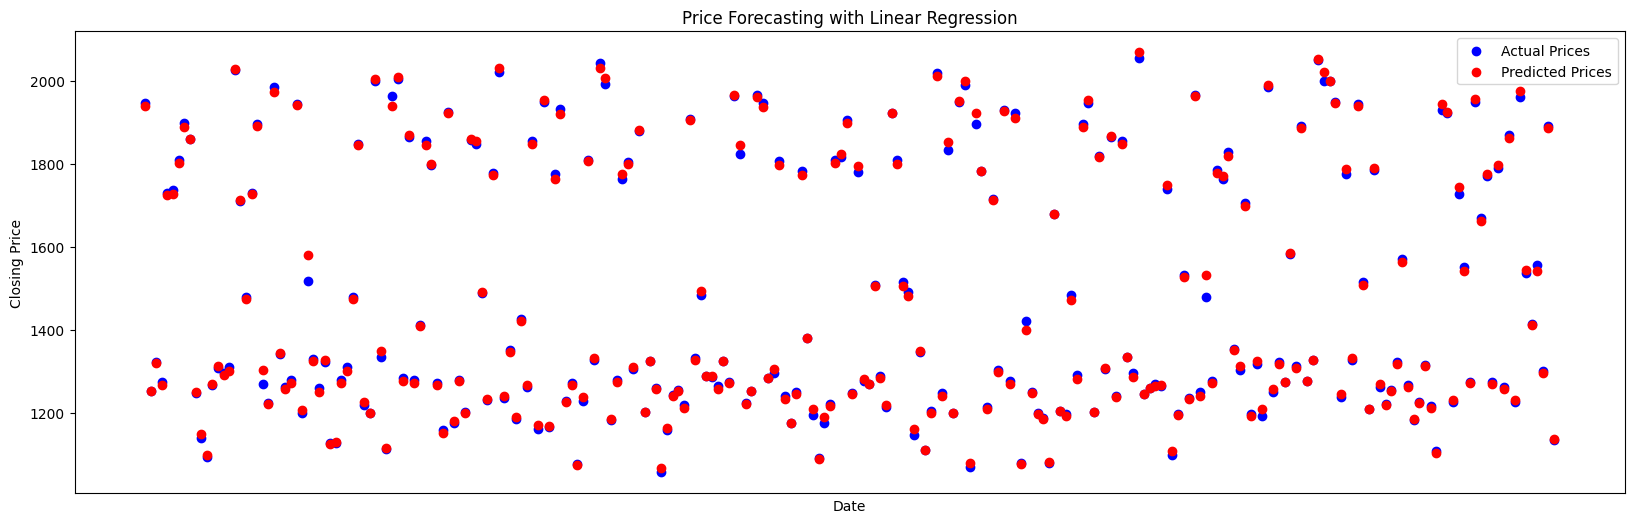

In [100]:
plt.figure(figsize=(20, 6))
plt.scatter(y_test.index, y_test, label='Actual Prices', color='blue')
plt.scatter(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Price Forecasting with Linear Regression')
plt.legend()
plt.xticks([])
plt.show()
